In [ ]:
!pip install easyocr
!pip install imutils
import cv2
import matplotlib.pyplot as plt

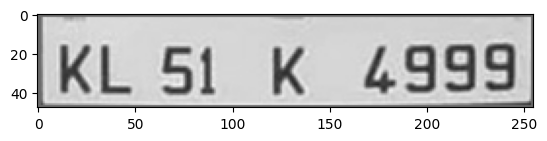

In [13]:
img = cv2.imread("..\\ANPR-osy\\cropped.png")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB)) 

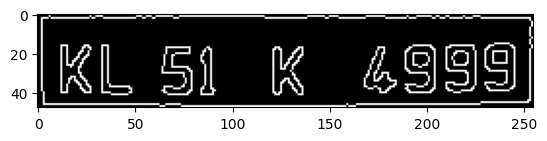

In [4]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) # Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [5]:
import imutils

keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key = cv2.contourArea, reverse = True)[:10]

In [6]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour,10, True)
    if len(approx)==4:
        location = approx
        break
        

In [7]:
location

array([[[  2,   2]],

       [[  3,  46]],

       [[253,  44]],

       [[253,   2]]], dtype=int32)

In [8]:
import numpy as np
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

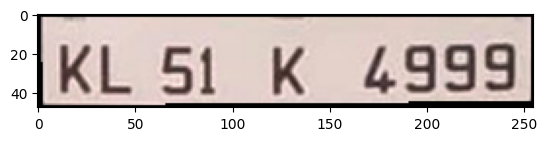

In [9]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [10]:
(x,y) = np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x), np.max(y))
new_imagee = gray[x1:x2+1, y1:y2+1]

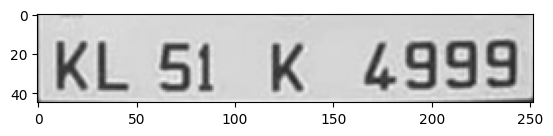

In [11]:
plt.imshow(cv2.cvtColor(new_imagee, cv2.COLOR_BGR2RGB))

In [12]:
import easyocr
reader = easyocr.Reader(['en'])
result = reader.readtext(new_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


[([[5, 11], [99, 11], [99, 48], [5, 48]], 'KL 51', 0.5427609385749798),
 ([[116, 14], [144, 14], [144, 48], [116, 48]], 'K', 0.9905970451566191),
 ([[161, 8], [254, 8], [254, 48], [161, 48]], 'L9gg', 0.7921207547187805)]